## Homework 5

## Problem Description

You are given the data '04car_train.txt' which includes a set of cars with their attributes. Your goal is to build a linear model that considers the price of cars (the first column in the data) as the response of the other car attributes. The homework will be graded based on two parts: (80pt) The following report on model estimation and selection, and (20pt) the prediction performance of your model using a set of test data held by the TA. Details will be explained as follows.

## Step 0. Visualize your data (10pt)

Perform PCA on attributes and plot out all cars on the plan of PC1 and PC2. Tag cars with their prices. 

## Step 1. Import data and create a simple linear model (20pt)

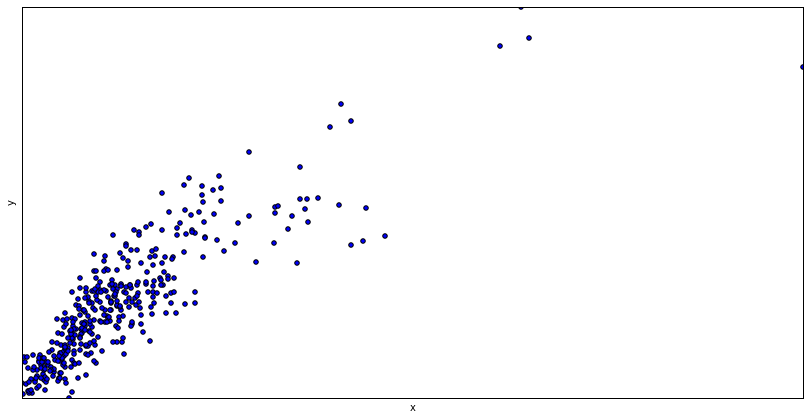

In [7]:
# use this if you are using ipython notebook, otherwise comment it out
%matplotlib inline 

# loading all packages... #
import numpy as np 
from sklearn import decomposition
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# loading the data #
data = np.genfromtxt('04car.txt')
data_scaled = StandardScaler().fit_transform(data) # preprocess the data

# response are car prices, i.e., the first column of the data matrix #
y = data_scaled[:,0]

# covariates are the other columns. Dealer cost is not included since it correlates too much with the price #
X = data_scaled[:,2:data_scaled.shape[1]]

# # split only on our side
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
# test_size=0.1, random_state=0)

# use the following for students
X_train = X;
y_train = y;

# a set of linear models with polynomial terms
n, p = X_train.shape # get #samples and #dimensions
degrees = [1] # create a simple linear model with no polynomial terms
error = np.zeros(len(degrees)) # training error
ncv = 10 # number of cross valiation 
scores = np.zeros((len(degrees),ncv)) # cv error


plt.figure(figsize=(14, 7))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    error[i] = ((pipeline.predict(X_train) - y_train)**2).sum()
    
    yhat = pipeline.predict(X_train)

    # Evaluate the models using crossvalidation
    scores[i,] = cross_validation.cross_val_score(pipeline,
        X_train, y_train, scoring="mean_squared_error", cv=ncv)
    
    plt.scatter(y_train, yhat)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((min(y_train), max(y_train)))
    plt.ylim((min(yhat), max(yhat)))

## Step 2. Now use the same code to create multiple models and compare (30pt)

Compare models using crossvalidation, AIC and BIC. Discuss how model complex affects the training error and these model selection criteria.

In [ ]:
%matplotlib inline # use this if you are using ipython notebook, otherwise comment it out

# loading all packages... #
import numpy as np 
from sklearn import decomposition
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# loading the data #
data = np.genfromtxt('04car.txt')
data_scaled = StandardScaler().fit_transform(data) # preprocess the data

# response are car prices, i.e., the first column of the data matrix #
y = data_scaled[:,0]

# covariates are the other columns. Dealer cost is not included since it correlates too much with the price #
X = data_scaled[:,2:data_scaled.shape[1]]

# # split only on our side
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
# test_size=0.1, random_state=0)

# use the following for students
X_train = X;
y_train = y;

# a set of linear models with polynomial terms
n, p = X_train.shape # get #samples and #dimensions
degrees = [1, 2, 3] 
error = np.zeros(len(degrees)) # training error
ncv = 10 # number of cross valiation 
scores = np.zeros((len(degrees),ncv)) # cv error


plt.figure(figsize=(14, 7))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    error[i] = ((pipeline.predict(X_train) - y_train)**2).sum()
    
    yhat = pipeline.predict(X_train)

    # Evaluate the models using crossvalidation
    scores[i,] = cross_validation.cross_val_score(pipeline,
        X_train, y_train, scoring="mean_squared_error", cv=ncv)
    
    plt.scatter(y_train, yhat)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((min(y_train), max(y_train)))
    plt.ylim((min(yhat), max(yhat)))

# Step 3. Propose your own model and compare with the above ones (20pt)

Propose your own linear model (does not have to contain only polynomial terms). Report its crossvalidation, AIC and BIC scores. 